In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from functools import partialmethod
pd.DataFrame.head = partialmethod(pd.DataFrame.head, n=7)

In [3]:
df = pd.read_csv("finhack/train_LTFS.csv")
target = 'loan_default'

In [4]:
df.isna().sum().sort_values(ascending = False).head()

Employment.Type          7661
UniqueID                    0
SEC.SANCTIONED.AMOUNT       0
PRI.OVERDUE.ACCTS           0
PRI.CURRENT.BALANCE         0
dtype: int64

In [5]:
df[df.columns[df.isna().any()].tolist()].value_counts()

Employment.Type
Self employed      127635
Salaried            97858
dtype: int64

In [6]:
df = df.dropna()

As we can see only 1 field contains Nan Values, let's research it. Nan values ~ 3% of the initial data so it can be dropped, however, we can try to somehow predict it. For now, we can drop it.

In [7]:
df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [8]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [9]:
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

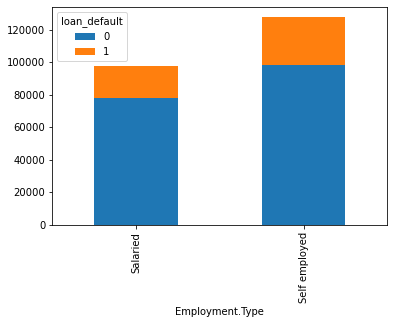

In [10]:
_ = pd.crosstab(df['Employment.Type'],df[target]).plot.bar(stacked=True)

We can see that distribution of default clients in each salary type is quiet balanced.

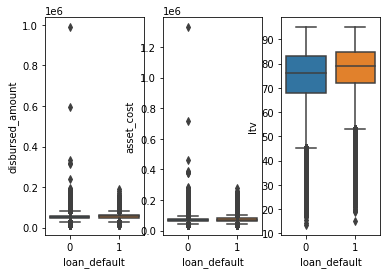

In [12]:
cols_numeric = ['disbursed_amount','asset_cost','ltv']

for ind, col in enumerate(cols_numeric):
    plt.subplot(1, len(cols_numeric), ind + 1)
    sns.boxplot(y = col, x = target, data = df)

Clear deviaions in 'disbursed_amount' and 'asset_cost', let's clear them out.

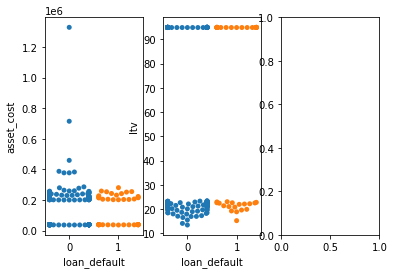

In [14]:
for ind, col in enumerate(cols_numeric):
    P = np.percentile(df[col], [0.05, 99.95])
    _ = sns.swarmplot(y = col, x = target, data = df[(df[col] < P[0]) | (df[col] > P[1])])
    plt.subplot(1, len(cols_numeric), ind + 1)

Here we take a look at the outliers, seems like there are no evident relations with target. (But if salary if 'asset_cost' is large enough (~400_000 USD and higher there are no defaults)

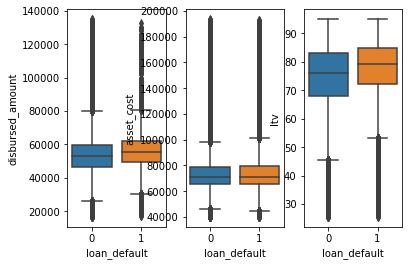

In [17]:
if True:
    for col in cols_numeric:
        P = np.percentile(df[col], [0.05, 99.95])
        df = df[(df[col] > P[0]) & (df[col] < P[1])]
for ind, col in enumerate(cols_numeric):
    plt.subplot(1, len(cols_numeric), ind + 1)
    sns.boxplot(y = col, x = target, data = df)

<AxesSubplot:xlabel='loan_default', ylabel='count'>

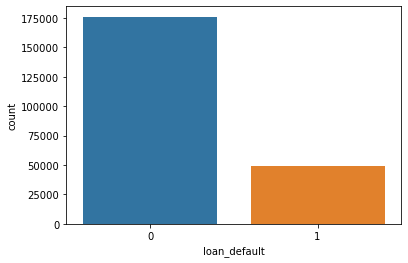

In [18]:
sns.countplot(x = target, data = df)

Overall, dataset is quite well-balanced as ratio of defaulted clients is approximately 22% 